<a href="https://colab.research.google.com/github/axelBarroso/AdventOfCode_2017/blob/master/week02_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Starting with Keras**

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. In other words, Keras is specially good for beginners, its modular, minimalist and its easy to get a neural network up and running in no time. 

Based on:
- https://elitedatascience.com/keras-tutorial-deep-learning-in-python

The following code is just a brief introduction to Keras, please, refer to [Keras documentation](https://keras.io/) to learn more about it.

# **Import Libraries and Modules**

Colab already has everything you need installed. We highly recommend to use Colab for this tutorial, however, if you want to use your our environment, you will need to setup a Python environment and install Keras on it. 

You can find multiple guides that will help you on the task of installing Keras on your own machine. Some examples for [Windows](http://inmachineswetrust.com/posts/deep-learning-setup/) or [Ubuntu](https://medium.com/@naomi.fridman/install-conda-tensorflow-gpu-and-keras-on-ubuntu-18-04-1b403e740e25).

We will import numpy and set a seed for its pseudorandom number generator. This seed is important when results want to be reproduced, since different initialisation could led to varying results.

In [0]:
import numpy as np
np.random.seed(123)  # for reproducibility

Now, we are ready to start importing Keras' modules.

We will import the Sequential model from Keras. Sequential module is a simply linear stack of neural network layers, and it will be used when creating our first feed-forward network. 


In [0]:
from keras.models import Sequential

Using TensorFlow backend.


As displayed by Python console, we are using TensorFlow backend. As mentioned, Keras is a wrapper that allows us to use either Theano or TensorFlow backend. It is easy to switch between them if application requires. In this tutorial, we will use TensorFlow backend. 

Next, we will import the "core" layers to build a network on Keras. These are the most common layers in simple neural networks. It is a good moment now to refer to Keras documentation and learn more about them: [Dense](https://keras.io/layers/core/#dense), [Dropout](https://keras.io/layers/core/#dropout), [Activation](https://keras.io/layers/core/#activation) and [Flatten](https://keras.io/layers/core/#flatten).

In [0]:
from keras.layers import Dense, Dropout, Activation

In addition, we import some utils, that will help us later with visualisation and transforming the dataset.

In [0]:
from keras.utils import np_utils
import matplotlib.pyplot as plt

# **Load datasets from Keras**

Besides the modules to build our neural networks, Keras library also contains [standard datasets](https://keras.io/datasets/). The fact that those datasets are inside Keras makes it really handy and can save us a lot of time when learning how to create our first neural network. 

We will import image MNIST dataset and load it:

In [0]:
from keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Now we have on X_train/X_test variables the training/test partitions provided by Keras,  and on y_train/y_test their corresponding labels.

We can now look into the shape of the data, and visualise some data examples:




Image shape: (28, 28)
Total number of training samples: 60000
Total number of test samples: 10000


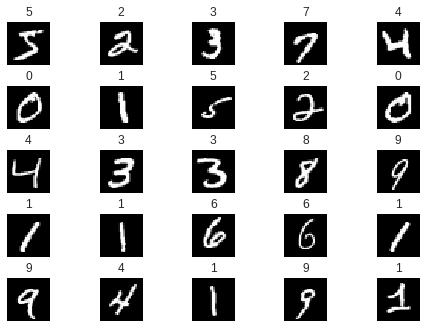

In [0]:
print('Image shape: {0}'.format(X_train.shape[1:]))
print('Total number of training samples: {0}'.format(X_train.shape[0]))
print('Total number of test samples: {0}'.format(X_test.shape[0]))

N=5
start_val = 0 # pick an element for the code to plot the following N**2 values
fig, axes = plt.subplots(N,N)
items = list(range(0, 10))
for row in range(N):
  for col in range(N):
    idx = start_val+row+N*col
    axes[row,col].imshow(X_train[idx], cmap='gray')
    fig.subplots_adjust(hspace=0.5)
    y_target = int(y_train[idx])
    target = str(items[y_target])
    axes[row,col].set_title(target)
    axes[row,col].set_xticks([])
    axes[row,col].set_yticks([])

Therefore, we have 60,000 training samples and 1,000 test samples, where each images has a shape of 28 pixels x 28 pixels. It is a good advise to always visualise the data before starting to deploy any algorithm. It is a quick sanity check that can prevent easily avoidable mistakes.

# **Preprocess Keras dataset**

The first example on this tutorials is an image dataset, where we will train a simple model to classify the digits on MNIST dataset. In oder to do so, we will reshape images to have a single dimension. Therefore, same network could be used for any 1D data.  We will see on following weeks that when using Convolutional Neural Networks we must define a 3D shape for images (depth, width, height), and it will get much higher results. 

In [0]:
X_train_flatten = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test_flatten = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

print('New X_train shape: {0}'.format(X_train_flatten.shape))

New X_train shape: (60000, 784)


Now we can normalise the dataset to the range [0, 1] and it will be ready for training the model.

In [0]:
X_train_flatten = X_train_flatten.astype('float32')
X_test_flatten = X_test_flatten.astype('float32')
X_train_flatten /= 255
X_test_flatten /= 255

Now that the data is ready to train the model, we also need to make ready the labels. The y_train and y_test labels are not split into 10 distinct class labels, but rather are represented as a single array with the class values. That could be fine if we present the problem as a regression one, but in this first example, we want to train a classifier. Therefore, we need to convert 1D value to a 10D vector, each dimension representing one digit value. 




In [0]:
Y_train_class = np_utils.to_categorical(y_train, 10)
Y_test_class = np_utils.to_categorical(y_test, 10)

print('New Y_train shape: {0}'.format(Y_train_class.shape))

New Y_train shape: (60000, 10)


# **Model Architecture**

Defining model architectures is a critical step when trying to solve a task. In this week, we will understand how models can be build, starting from simplest model and then, building a more real example. In addition, here is a list of [implementation on Keras](https://github.com/keras-team/keras/tree/master/examples) that could be used to improve the following results. 

First, we need to declare a sequential model. A sequential model is a linear stack of neural network layers. We, therefore, can create a Sequential model by passing a list of layer instances to the constructor: 

In [0]:
model = Sequential([
    Dense(10, input_shape=(784,)),
    Activation('softmax'),
])

Keras also allows us to simply add layers via the .add() method:

In [0]:
model = Sequential()
model.add(Dense(10, input_dim=784))
model.add(Activation('softmax'))

The model needs to know what input shape is going to receive. For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape. As seen previously, after the flatten operation our images have a shape of 784. If we were using directly images, the input shape would be (1, 28, 28) that corresponds to the (depth, width, height) of each digit image.

We now can check the model shape output:

In [0]:
print model.output_shape

(None, 10)


The dense layer used in our model is a fully connected layer, where the first parameter is the output size of the layer. Keras automatically handles the connections between layers. Note that the final layer has an output size of 10, corresponding to the 10 classes of digits.

We can see how our model looks like:

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# **Compilation**

Before starting to train our model, we need to configure the learning process, which is done via the compile method. We need to define three important parameters here:

*   The loss function that the model will try to minimize.
*   The optimiser to minimise the loss function.
*   The list of metrics you want the model to compute.

In our example, as we are doing classification, we will define the categorical_crossentropy as the loss function and we will compute the accuracy metric. You can refer to Keras documentation to learn more about [losses](https://keras.io/losses/) or [optimisers](https://keras.io/optimizers/). There are many other parameters (learning rate, decay factor, weight normalisation...) than could be manually set, however, those parameters will be address in following weeks. Now, we will use the default values for them. 



In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# **Training**

In order to train the model, we will use the module fit(). We need to define the batch size and the number of total epochs the model is going to train. Once done everything, we are finally ready to train our classifier! 

In [0]:
history = model.fit(X_train_flatten, Y_train_class, batch_size=32, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.4674 - acc: 0.8781
Epoch 2/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.3040 - acc: 0.9155
Epoch 3/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.2834 - acc: 0.9209
Epoch 4/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.2727 - acc: 0.9234
Epoch 5/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.2663 - acc: 0.9266
Epoch 6/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.2619 - acc: 0.9272
Epoch 7/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.2579 - acc: 0.9286
Epoch 8/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.2549 - acc: 0.9293
Epoch 9/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.2527 - acc: 0.9303
Epoch 10/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.2505 - a

We have trained our first model! 

Now, imagine we need to train the model until it converges, and we do not know how many epochs it will take. Then, we could use callbacks to define early-stopping rules. In addition, we can use those [callbacks](https://keras.io/callbacks/) to save the model's weights or log history along the training process. We will see later some examples.


Sometimes, the training curves can give some information. In order to visualise them, we could use the information saved on the training history:

Text(0.5,0,u'Epoch')

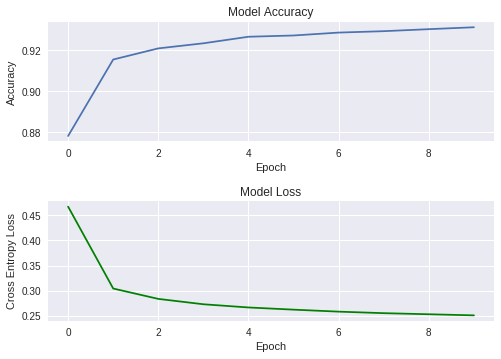

In [0]:
fig, axes = plt.subplots(2,1)
axes[0].plot(history.history['acc'])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')

fig.subplots_adjust(hspace=0.5)

axes[1].plot(history.history['loss'], 'g')
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Cross Entropy Loss')
axes[1].set_xlabel('Epoch')

# **Evaluate Model**

Finally, we can evaluate our model on the test data:

In [0]:
score = model.evaluate(X_test_flatten, Y_test_class, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

('Test loss:', 0.2623196675568819)
('Test accuracy:', 0.9288)


# **Train A Simple Multi-layer Perceptron**

Previously, we have trained the simplest network. Here we show how to combine different sequential layers. We define a more complex model in order to see how that affects final test accuracy.

In [0]:
model2 = Sequential()
model2.add(Dense(100, activation='relu', input_shape=(784,)))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


We have increase the number of parameters from 7,850 to 79,510 in just a few lines! Now we are using an extra dense layer, this one having a higher number of units. Remember that the number of units defines the dimensionality of the output space, that is why, we need the last layer to have the same number of digit classes. 

In addition, we use ReLU (Rectified Linear Unit) activation function in first dense layer. You can learn more about it [here](https://keras.io/activations/#relu). Moreover, we added a Dropout layer, which is a method for regularising the model in order to prevent overfitting. You can read more about it  [here](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5).

As done above, we can train our new model and visualise the model curves:

Epoch 1/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.3208 - acc: 0.9081
Epoch 2/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.1570 - acc: 0.9536
Epoch 3/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.1196 - acc: 0.9644
Epoch 4/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.1011 - acc: 0.9685
Epoch 5/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.0885 - acc: 0.9729
Epoch 6/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.0789 - acc: 0.9752
Epoch 7/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.0710 - acc: 0.9779
Epoch 8/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.0667 - acc: 0.9782
Epoch 9/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.0605 - acc: 0.9800
Epoch 10/10
60000/60000 [==============================] - 10s 166us/step - loss: 

Text(0.5,0,u'Epoch')

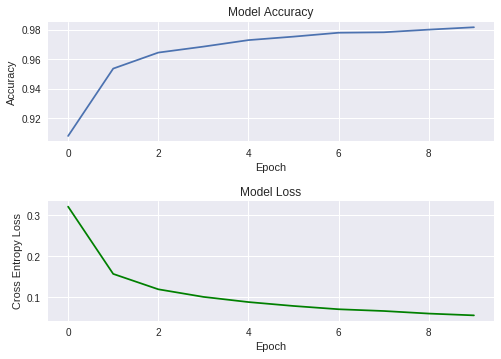

In [0]:
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history2 = model2.fit(X_train_flatten, Y_train_class, batch_size=32, epochs=10)

fig, axes = plt.subplots(2,1)
axes[0].plot(history2.history['acc'])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')

fig.subplots_adjust(hspace=0.5)

axes[1].plot(history2.history['loss'], 'g')
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Cross Entropy Loss')
axes[1].set_xlabel('Epoch')

We have now trained the two models, and we can see how this extra layer and the regularisation term improves results:

In [0]:
print('Old model:')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print('New model:')
score2 = model2.evaluate(X_test_flatten, Y_test_class, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Old model:
('Test loss:', 0.2623196675568819)
('Test accuracy:', 0.9288)
New model:
('Test loss:', 0.07408983775803936)
('Test accuracy:', 0.9779)


We have improved accuracy results on test, however, there is still a lot of margin for parameter tuning. Do you think you can change the model and improve results?

# **Save/Load Model**

Some networks will require long training times (hours, days or even weeks), it is essential then to know how to save models for using them afterwards without the need of performing the training each time. 

We can save and load the trained model in different ways.

Saving the Keras model into a single HDF5 file, which will contain:

*   the architecture of the model, allowing to re-create the model
*   the weights of the model
*   the training configuration (loss, optimiser)
*   the state of the optimiser, allowing to resume training exactly where you left off.

[Here](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model) you can find more information about the process.


In [0]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# Load a compiled model identical to the previous one
model = load_model('my_model.h5') 

Saving the model and weights independently:




In [0]:
model.save_weights('my_model_weights.h5') # creates a HDF5 file 'my_model_weights.h5'

with open('my_model_architecture.json', 'w') as f:
    f.write(model.to_json()) # creates a json file 'my_model_architecture.json'

If we want to load the model, without having to instantiate it, we can directly use model_from_json module:

In [0]:
from keras.models import model_from_json

# Model reconstruction from JSON file
with open('my_model_architecture.json', 'r') as f:
    model = model_from_json(f.read())

If we do not load the model, but we have instantiated it, we can then load the weights directly:

In [0]:
model.load_weights('my_model_weights.h5')

Imagine now that we modify the model and the new model shares some layers in common with the saved one. This situation is common when you do things like fine-tuning or transfer-learning, among others. We could then load the weights into a different architecture by layer name:

In [0]:
model.load_weights('my_model_weights.h5', by_name=True)

# **Obtain output of an intermediate layer**

Sometimes we need to check how features of intermediate layers look like. This can be used for extracting features, but also for debugging purposes. That is why, we need to see how we can extract information of a trained architecture.

The easiest way is to define a new model that will have as final output the given output of an specific layer. We first define the model:

In [0]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,), name='first_dense'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', input_shape=(784,), name='second_dense'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax', name='final_dense'))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_dense (Dense)          (None, 64)                50240     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
second_dense (Dense)         (None, 128)               8320      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
final_dense (Dense)          (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


Now, we specify the name of the layer in which we are interested to obtain the output, in our example, it is the first dense layer:

In [0]:
from keras.models import Model

layer_name = 'second_dense'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(X_test_flatten)
final_output = model.predict(X_test_flatten)

print('Second dense layer output shape: {0}'.format(intermediate_output.shape))
print('Final output shape: {0}'.format(final_output.shape))

Second dense layer output shape: (10000, 128)
Final output shape: (10000, 10)


Alternatively, we could build a Keras function that will return the output of a certain layer given a certain input, for example:

In [0]:
from keras import backend as K

get_second_dense_layer_output = K.function([model.layers[0].input],
                                  [model.layers[2].output])

intermediate_output = get_second_dense_layer_output([X_test_flatten])[0]
final_output = model.predict(X_test_flatten)

print('Second dense layer output shape: {0}'.format(intermediate_output.shape))
print('Final output shape: {0}'.format(final_output.shape))

Second dense layer output shape: (10000, 128)
Final output shape: (10000, 10)


# **Use a Callback Function**

We talked about callbacks already, and you can find a complete list here.

Controlling and managing callbacks is essential when training big models. Sometimes we want the network to train until it converges, but we are not able to determine the number of epochs it will take, therefore we need some mechanism to stop it. Let's see how to stop the training when the validation loss is not decreasing anymore:

In [0]:
from keras.callbacks import EarlyStopping

# Define the metric that will determine the earlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# We use an already training model to speed up the example
model2.fit(X_train_flatten, Y_train_class, validation_split=0.2, 
            batch_size=32, callbacks=[early_stopping])

Train on 48000 samples, validate on 12000 samples
Epoch 1/1
48000/48000 [==============================] - 8s 176us/step - loss: 0.0510 - acc: 0.9832 - val_loss: 0.0277 - val_acc: 0.9918


We can combine multiple callbacks when calling the fit module, learn more about it  [here](https://keras.io/callbacks/).

# **Freeze Keras Layers**

Sometime we need to fix the weights of some layers, meaning that we will exclude them from training, i.e. their weights will never be updated. This is useful in the context of fine-tuning a model, or, for instance, when using fixed embeddings for text inputs. 

In order to do so, we can pass a trainable argument (Boolean) to a layer constructor to set a layer to be non-trainable:

In [0]:
frozen_layer = Dense(32, trainable=False)

Additionally, we can set the trainable property of a layer to True or False after instantiation. For this to take effect, we will need to call compile() on our model after modifying the trainable property:

In [0]:
from keras.models import clone_model
 
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(784,)))

# We clone model in frozen_model
frozen_model = clone_model(model)
frozen_model.layers[0].trainable = False

# with this model the weights of the layer will be updated during training
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# in the model below, the weights of `layer` will not be updated during training
frozen_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()
frozen_model.summary()

score_untrained = model.evaluate(X_test_flatten, Y_test_class, verbose=0)
score_frozen_untrained = frozen_model.evaluate(X_test_flatten, Y_test_class, verbose=0)

# Uupdate the weights of `layer`
print('Train Models:/n')
model.fit(X_train_flatten, Y_train_class, batch_size=32, epochs=5)

# Next operation will NOT update the weights of `layer`.
# (which will also affect the above model since it uses the same layer instance)
frozen_model.fit(X_train_flatten, Y_train_class, batch_size=32, epochs=5)

score = model.evaluate(X_test_flatten, Y_test_class, verbose=0)
score_frozen = frozen_model.evaluate(X_test_flatten, Y_test_class, verbose=0)

print('Before Training: Trainable Model Test Accuracy:', score_untrained[1])
print('After Training:  Trainable Model Test Accuracy:', score[1])

print('Before Training: Frozen Model Test Accuracy:', score_frozen_untrained[1])
print('After Training:  Frozen Model Test Accuracy:', score_frozen[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 0
Non-trainable params: 7,850
_________________________________________________________________
Train Models:/n
Epoch 1/5
60000/60000 [==============================] - 8s 134us/step - loss: 1.2762 - acc: 0.8196
Epoch 2/5
60000/60000 [==============================] - 8s 131us/step - loss: 0.8598 - acc: 0.8646
Epoch 3/5
60000/60000 [==============================] - 8s 131us/step - loss: 0.7877 - acc: 0.8777
Epoch 4/5
60000/6000

We can see in the model description that the frozen model has 0 trainable parameters, while it has 7,850 non-trainable parameters.

After training the network, we see how the trainable model improves the accuracy while the frozen one does not change its accuracy.